# Monte Carlo 2

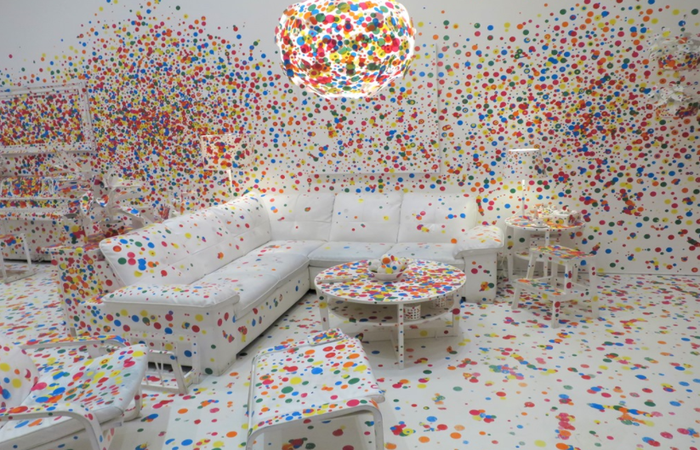

In [2]:
import kilroy
kilroy.Show('egon','pointillist_room.png',700,450)

*Egon gets loose in your living room... oh dear...*


### Friendly introduction

Now that you have met Egon with his dice and his cans of paint you are a bona fide citizen of
Monte Carlo. Fortunately the city is obsessed with mathematics and art. It is also notable 
that the citizens of Monte Carlo consider *food* to be a form of *art*; and they have a saying 
to celebrate this idea. It goes: *'Thou are what thou eatest; thus thou art.'* I think this
means that every citizen considers themselves and everyone else a work of art. 


Just the other day someone
formed a ${\large \pi e}$ club that divides its time between calculating ${\large \pi}$ 
(using Monte Carlo methods) and baking different sorts of $pie$, 
particularly mandarin orange pie, fig pie, persimmon pie, 
pomegranate pie, pistachio pie, carob pie, cactus pear pie, and loquat cake.


On this Notebook two items are complete. The first is Egon trying out a new rule; and the second
is where I managed to build a Monte Carlo program for calculating the value of $\pi$. 


However the rest of this Notebook is under construction as I try and figure out how to animate Sally's walk
along the wharf. (Recall she banged her head on an anchor and may or may not make it back to her boat.)

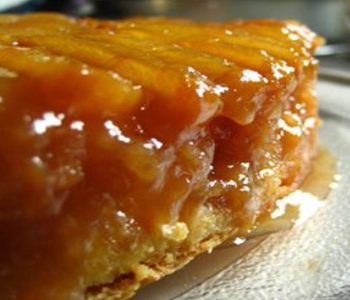

In [3]:
kilroy.Show('food','loquat_cake.png',350,300)

*Some loquat cake... you can see why people who only eat pie might try some loquat cake*


### First part: Egon tries out a new rule


Egon noticed that a square (rather than a triangle) creates a fairly *un*-interesting pattern. To check
this you can return to Notebook **1 C Monte Carlo** and run the very last program at the botton. Move the
slider to select 4 cans and keep the distance at 0.5. You should see a rather boring result. 


Egon thought 'Perhaps I could modify the procedure to make this more interesting...' and his first idea 
was to only select a new vertex if it was not the one he just used. That is: Suppose he chooses vertex
A among four possibilities A, B, C, and D. Then his next choice must be from among B, C and D only. A is not
allowed. Of course A is allowed on the step after this one. 

In [4]:
import numpy as np
import random as r
from ipywidgets import *
from traitlets import dlink
%pylab inline 

# FMP stands for 'follow many paths'
#   This means that Egon gets all possible outcomes on his dice at once
#   We have four states of the two radio button choices...
#     noRepeats is True: We can never select the same vertex twice
#     noNextClockwise is True: We can never select the next-clockwise vertex
#   So FMP0R0N means both are False
#      FMP1R1N means both are True
# recursive methods to generate paint dot locations
# a is an x, y tuple of where we are
# level is the depth for bailing out
# endLevel is the bail out level
# nCans is how many vertices we have
# colorList is the colors indexed by vertex
# howFar is the distance to move
# v is a list of nCans vertics as x, y tuples
# x, y and mycolors are extensible lists of coordinates and colors
# colormod is the modulus to make sure we get a good color
# thisTarget is the index of the vertex we were headed towards when we landed here
def FMP1R0N(a, level, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, thisTarget):     
    if level == endLevel: return
    for i in range(nCans):
        if i != thisTarget:
            q = a + howFar*(v[i]-a)
            x.append(q[0])
            y.append(q[1])
            mycolors.append(colorList[i%colormod])
            FMP1R0N(q, level + 1, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, i)
    return

def FMP0R1N(a, level, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, thisTarget):     
    if level == endLevel: return
    for i in range(nCans):
        if i != (thisTarget + 1)%nCans:
            q = a + howFar*(v[i]-a)
            x.append(q[0])
            y.append(q[1])
            mycolors.append(colorList[i%colormod])
            FMP0R1N(q, level + 1, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, i)
    return

def FMP1R1N(a, level, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, thisTarget):     
    if level == endLevel: return
    for i in range(nCans):
        if i != thisTarget and i != (thisTarget + 1)%nCans:
            q = a + howFar*(v[i]-a)
            x.append(q[0])
            y.append(q[1])
            mycolors.append(colorList[i%colormod])
            FMP1R1N(q, level + 1, endLevel, nCans, colorList, howFar, v, x, y, mycolors, colormod, i)
    return

def EgonVariations(nCans, howFar, noRepeats, noNextClockwise):
    # v is the vertices list (2-element numpy arrays); x and y are float coordinate lists
    v, x, y, mycolors = [], [], [], []
    colorList = ['r', 'g', 'b', 'orange', 'k', 'cyan', 'magenta', 'yellow', 'grey']
    x.append(0.5)
    y.append(0.5)
    mycolors.append('k')

    # nDepth is the recursion depth of the algorithm
    if nCans <= 3: nDepth = 10
    elif nCans == 4: nDepth = 9
    elif nCans == 5: nDepth = 8
    elif nCans == 6: nDepth = 7
    elif nCans == 7: nDepth = 6
    elif nCans <= 10: nDepth = 5
    elif nCans <= 15: nDepth = 4
    else: nDepth = 3

    # place our paint cans regularly (no random location option)
    centerx, centery, radius = 0.5, 0.5, 0.5
    delta_angle = np.pi * 2.0 / float(nCans)
    this_angle = 0.0
    for i in range(nCans):
        v.append(np.array([radius * np.cos(this_angle) + centerx, radius * np.sin(this_angle) + centery]))
        this_angle += delta_angle

    # recursive paint-dot locator... all the myriad ways
    if noRepeats and not noNextClockwise:
        FMP1R0N((x[-1],y[-1]), 0, nDepth, nCans, colorList, howFar, v, x, y, mycolors, len(colorList), 0)
    elif not noRepeats and noNextClockwise: 
        FMP0R1N((x[-1],y[-1]), 0, nDepth, nCans, colorList, howFar, v, x, y, mycolors, len(colorList), 0)
    elif noRepeats and noNextClockwise:
        FMP1R1N((x[-1],y[-1]), 0, nDepth, nCans, colorList, howFar, v, x, y, mycolors, len(colorList), 0)
    else:
        print "Both radio buttons are off! Use the version on the 1 C Monte Carlo notebook for this!"

    # Draw the scatter plot of (x, y) pairs
    figdim = 13
    plt.figure(figsize=(figdim,figdim))

    # The ',' comma marker is a small dot, as is the period '.' marker
    plt.scatter(x, y, s=1, marker='.', color=mycolors)
    if howFar >= 0.0 and howFar <= 1.0:
        plt.xlim([0., 1.])
        plt.ylim([0., 1.])

# this sets up the controls: 2 sliders plus the checkbox
interact(EgonVariations, \
         nCans=widgets.IntSlider(min=2,max=13,step=1,value=4,continuous_update=False),\
         howFar=widgets.FloatSlider(min=-2.0,max=2.0,step=.01,value=0.5,continuous_update=False),\
         noRepeats=widgets.Checkbox(value=False,continuous_update=False),
         noNextClockwise=widgets.Checkbox(value=True,continuous_update=False)\
        )

Populating the interactive namespace from numpy and matplotlib


/home/nbuser/anaconda2_501/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Text', 'Widget', 'Button', 'interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


A Jupyter Widget

<function __main__.EgonVariations>

### Calculate $\pi$ using Monte Carlo (random numbers)


Here is a challenge: If you could generate a million random numbers between 0 and 1... how could you use those numbers to calculate $\pi$???


We calculate $\pi$ using random darts. Each dart lands in a square; either inside or outside a circle. We will not be able to calculate pi very *accurately* using this first idea; but approximate will be fun! 


Both of these ideas rely on the notion that the area of a circle with a radius of 1 is pi. The argument for this idea is built into one of the other math club team activities. 

In [5]:
# This is a Monte Carlo method program.
# Throw some darts at a dart board: If they land inside a quarter-circle they are 'hits'
# The ratio of hits to darts is the ratio of the quarter circle to a square of area 1
# Can you determine why we then multiply by four to get the area of the circle?
from ipywidgets import *
from traitlets import dlink
import numpy as np
import random as r

def ThrowDarts(dParam):
    x,y,c=[],[],[]
    hits = 0.0
    nDarts = dParam**3 + 5
    for i in range(nDarts):
        xd, yd = r.random(), r.random()
        if xd*xd+yd*yd < 1.0: 
            hits += 1.0
            c.append('r')
        else: c.append('k')
        x.append(xd)
        y.append(yd)
    if nDarts < 1000000: 
        print 'In Monte Carlo we threw', nDarts, 'darts so the circle area is about', '%.7f' % (4.0*hits/nDarts)
    else: 
        print '%3.1f' % (nDarts/1000000.), 'million darts, circle area ~', '%.7f' % (4.0*hits/nDarts)

    # standard plot
    if nDarts < 200000:
        print '(hang on for a couple seconds while the picture gets drawn)'
        figdim = 5
        plt.figure(figsize=(figdim,figdim))
        plt.axis('equal')
        plt.scatter(x, y, s=1, marker='.', color=c)
        plt.xlim([0., 1.])
        plt.ylim([0., 1.])
        plt.show()
    else: print '(Use less than two hundred thousand darts to see a picture of where they all landed)'

interact(ThrowDarts, dParam=widgets.IntSlider(min=1,max=200,step=1,value=1, continuous_update=False))


A Jupyter Widget

<function __main__.ThrowDarts>

# ${\Huge \ngtr}$


Alas this is where the sidewalk ends and where the work begins... on what comes next. Everything below here is *under construction*.

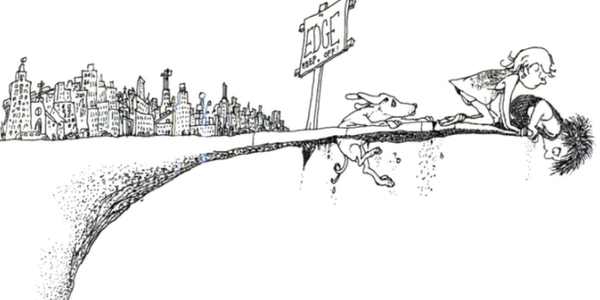

In [6]:
kilroy.Show('people','where_the_sidewalk_ends.png',600,300)

From here there is no more OMC content at the moment in this notebook.
What is next is to create a heat map of width versus length of the pier (color is probability) and then create 
a little animation of a person walking the pier.

### Sally the Pirate

Remember Sally the Pirate? We met her at the top of the previous **Monte Carlo** notebook. You may recall that
she accidentally bumped her head on an anchor on the way back to her pirate ship; and is now very dizzy. As
a result she takes one step forward and then stumbles randomly to the left or right one step. Let's set up a program
to track her progress along the wharf. Again: For each step forward she stumbles left or right by one step.

In [7]:
import numpy as np
from random import randint
from ipywidgets import *
from traitlets import dlink
%pylab inline

def SallyStats(nStepsWide, nStepsLong, nTrials):
    nFallOff = 0
    nFallOffRight = 0
    nFallOffLeft = 0
    for i in range(nTrials):
        lateralPosition = nStepsWide/2 + 1
        if i == 0: print lateralPosition
        for steps in range(nStepsLong):
            lateralPosition += 2*randint(0,2)-1
            if i == 0: print lateralPosition
            if lateralPosition == 0:
                nFallOffLeft += 1
                nFallOff += 1
                break
            if lateralPosition == nStepsWide + 1:
                nFallOffRight += 1
                nFallOff += 1
                break
    ratio = float(nFallOff)/float(nTrials)
    print 'fell off', nFallOff, 'times in',nTrials,'attempts:', '%.10f' % ratio, '(L/R = ',nFallOffLeft,'',nFallOffRight,')'


interact(SallyStats, nStepsWide=widgets.IntSlider(min=1,max=100,step=1,value=5, continuous_update=False),\
                     nStepsLong=widgets.IntSlider(min=1,max=200,step=1,value=10, continuous_update=False),\
                     nTrials=widgets.IntSlider(min=100,max=2100,step=100,value=100, continuous_update=False)
        )

Populating the interactive namespace from numpy and matplotlib


/home/nbuser/anaconda2_501/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Text', 'interactive', 'randint', 'Button', 'Widget']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


A Jupyter Widget

<function __main__.SallyStats>

In [8]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
# from JSAnimation import IPython_display
# from matplotlib import animation
import numpy as np
from random import randint
from ipywidgets import *
from traitlets import dlink

# put the resulting figure below this cell in the browser
# %pylab inline


# create a simple animation
# fig = plt.figure()
# ax = plt.axes(xlim=(0, 200), ylim=(-10, 10))
# line, = ax.plot([], [], lw=2)
# x = np.linspace(0, 10, 1000)

xc, yc, c = [],[],[]
nStepsWide = 21
nStepsLong = 100

def SallyWalksTheWharf(frameNumber):
    global xc, yc, c, nStepsWide, nStepsLong
    x0 = 0
    y = 0
    x = [np.array([x0, y])]
    c = ['k']
    # taking the loop out so as to make the method the iterated code
    # for i in range(1, nStepsLong+1):
    y += 2*randint(0, 2)-1
    x.append([i, y])
    c.append('r')
    xc, yc = [q[0] for q in x], [q[1] for q in x] 
    figWid = nStepsLong * 14 / 100
    figHgt = nStepsWide * 3 / 21
    plt.figure(figsize=(figWid,figHgt))
    plt.axes(xlim=(0, nStepsLong), ylim=(-nStepsWide/2, nStepsWide/2))
    plt.scatter(xc, yc, s=160, marker='.', color=c)
    plt.plot(xc, yc, lw=2, color='k')
    
#SallyWalksTheWharf(21,100)
# interact(SallyWalksTheWharf, nStepsWide=widgets.IntSlider(min=1,max=100,step=1,value=21, continuous_update=False),\
#                             nStepsLong=widgets.IntSlider(min=1,max=200,step=1,value=100, continuous_update=False))

def initSally():
    line.set_data([], [])
    return line,

def animateSally(i):
    line.set_data(x, np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi))
    return line,

# animation.FuncAnimation(fig, SallyWalksTheWharf, init_func=initSally, frames=100, interval=1, blit=True)

In [11]:
# oh dear this is dreadful
# we should be using 
# !conda install JSAnimation
!pwd; \
cd ..; \
mkdir js2; \
cd js2; \
pwd; \
wget https://github.com/jakevdp/JSAnimation/archive/master.zip; \
unzip master.zip; \
cd JSAnimation-master; \
python setup.py install --user; \
pwd


/home/nbuser/library
/home/nbuser/js2
--2017-12-19 20:01:03--  https://github.com/jakevdp/JSAnimation/archive/master.zip
Resolving webproxy (webproxy)... 192.168.1.101
Connecting to webproxy (webproxy)|192.168.1.101|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://codeload.github.com/jakevdp/JSAnimation/zip/master [following]
--2017-12-19 20:01:03--  https://codeload.github.com/jakevdp/JSAnimation/zip/master
Connecting to webproxy (webproxy)|192.168.1.101|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: 'master.zip'

master.zip              [ <=>                ] 969.31K  5.36MB/s    in 0.2s    

2017-12-19 20:01:03 (5.36 MB/s) - 'master.zip' saved [992571]

Archive:  master.zip
d290db11ebb5427769b76fc532f2d10c4ea3391f
   creating: JSAnimation-master/
  inflating: JSAnimation-master/.gitignore  
   creating: JSAnimation-master/JSAnimation/
  inflating: JSAnimation-master/JSAnimat

TypeError: 'list' object cannot be interpreted as an index

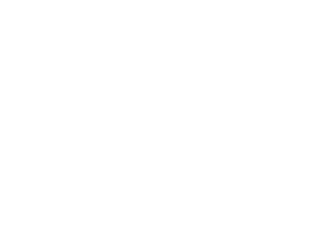

In [12]:
"""
Lorenz animation
Adapted from http://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/
"""

import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

from JSAnimation import HTMLWriter

N_trajectories = 20


def lorentz_deriv((x, y, z), t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorentz system."""
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 2, 500)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t) for x0i in x0])

# Set up figure & 3D axis for animation
fig = plt.figure(figsize=(4, 3))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c) for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c, ms=4) for c in colors], [])

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i + 1].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=30, blit=True)

# set embed_frames=False so that frames will be stored individually
anim.save('lorenz_animation.html', writer=HTMLWriter(embed_frames=False))


In [13]:
from JSAnimation import examples

Populating the interactive namespace from numpy and matplotlib


/home/nbuser/anaconda2_501/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Text', 'interactive', 'randint', 'Button', 'colors', 'Widget']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"



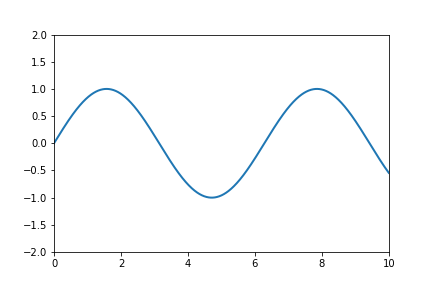
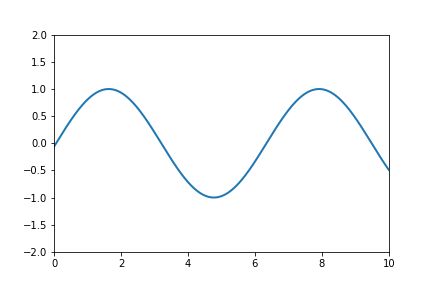
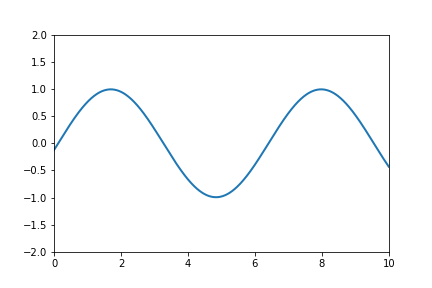
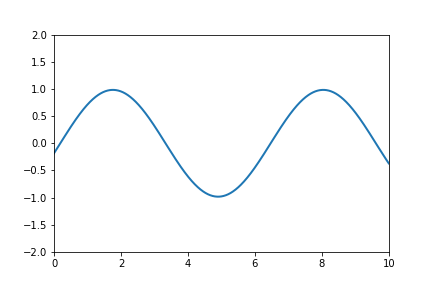
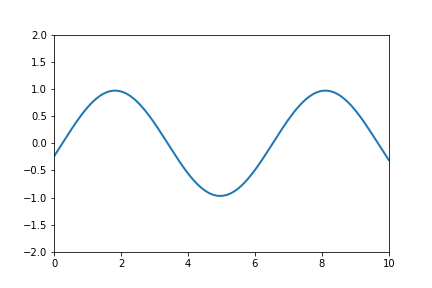
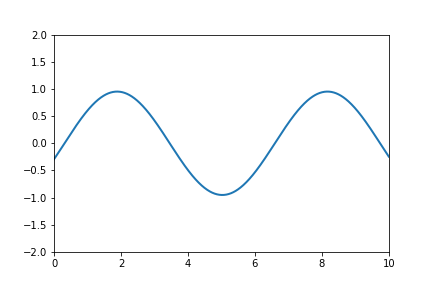
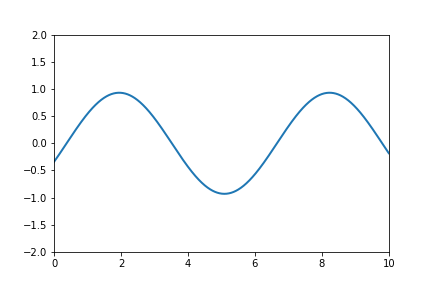
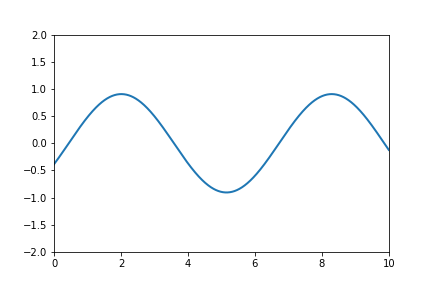
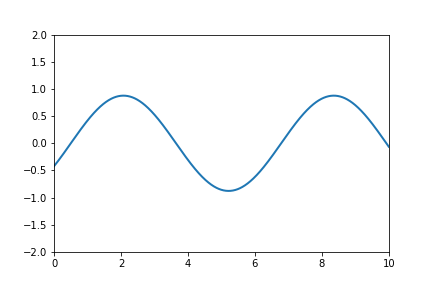
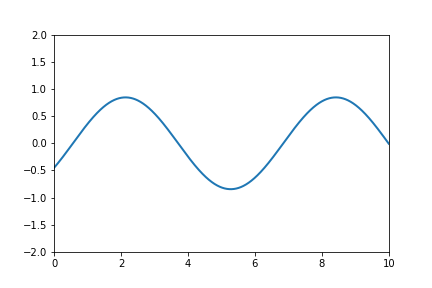
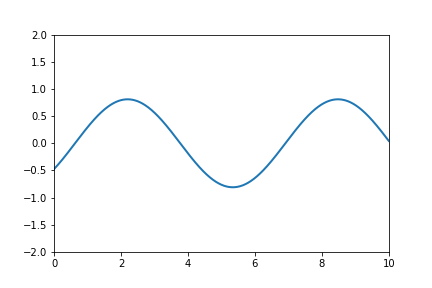
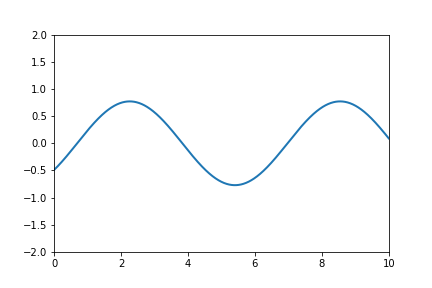
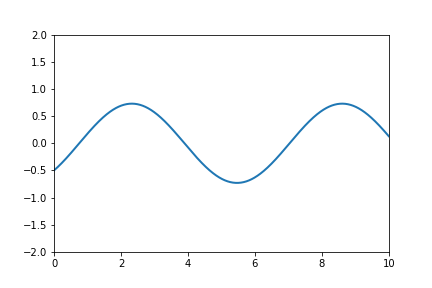
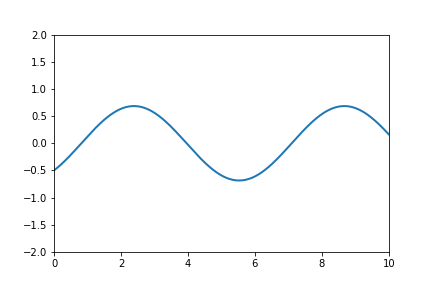
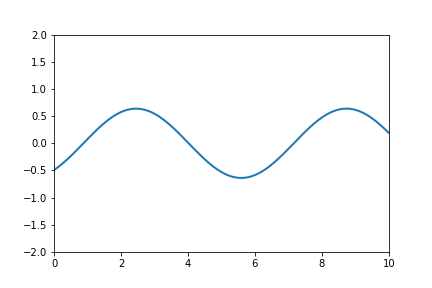
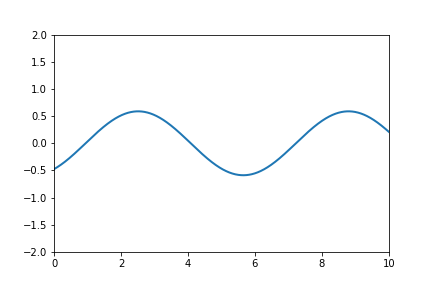
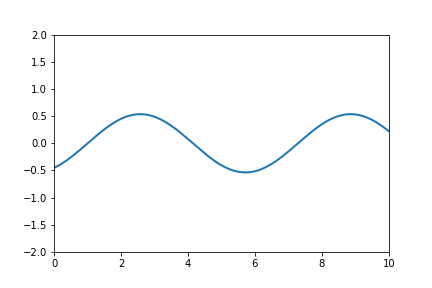
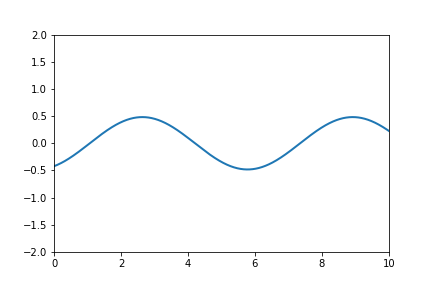
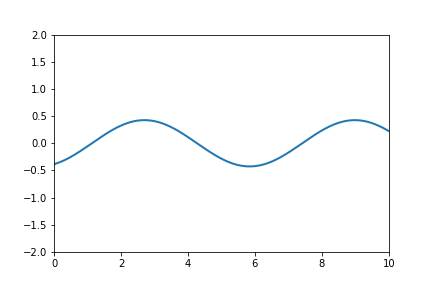
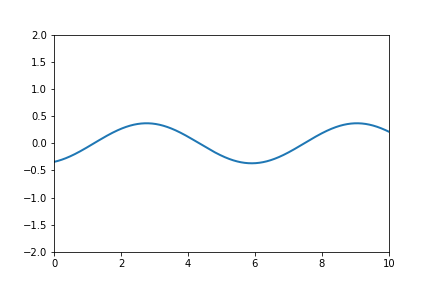
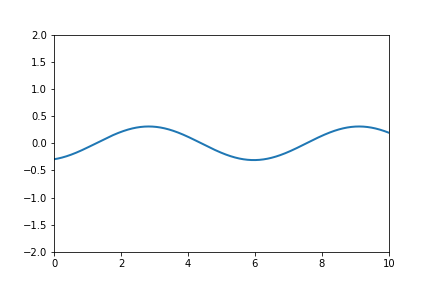
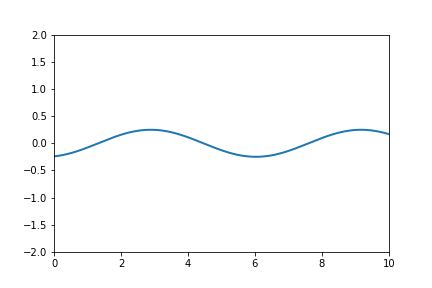
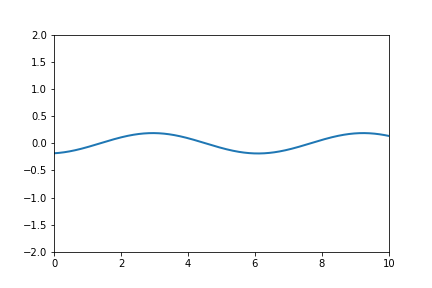
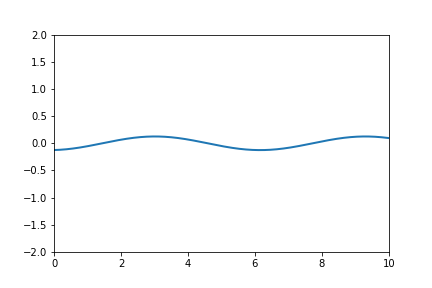
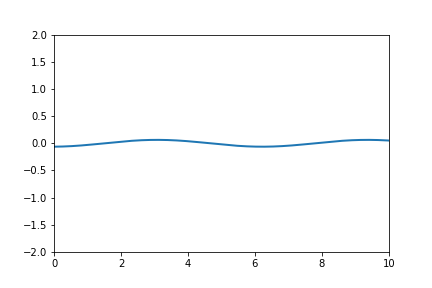
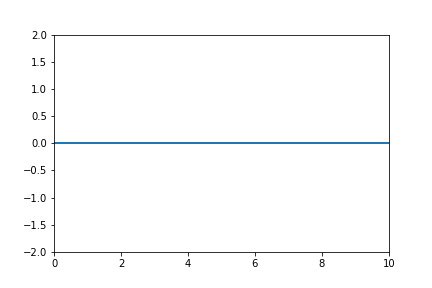
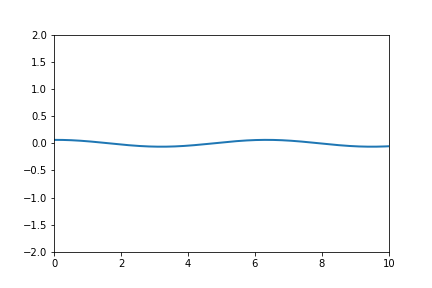
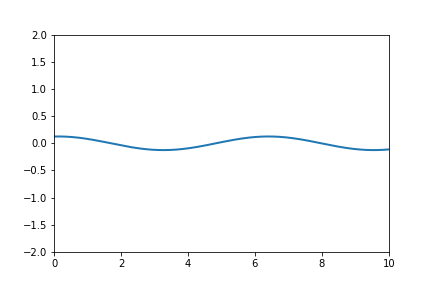
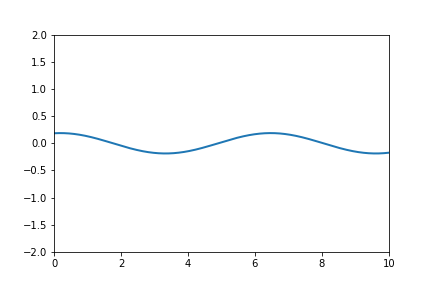
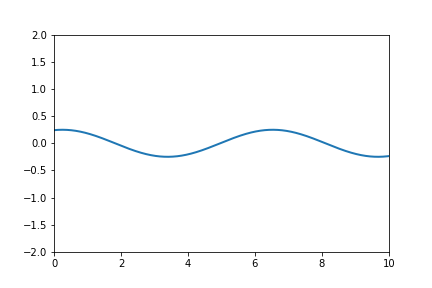
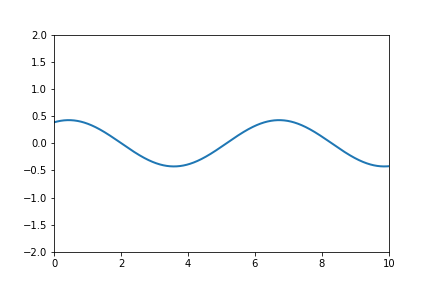
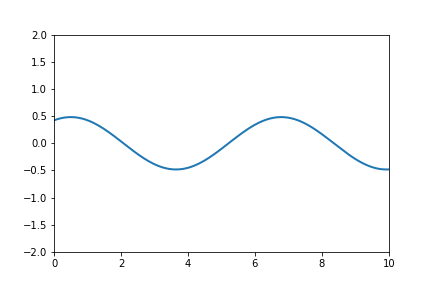
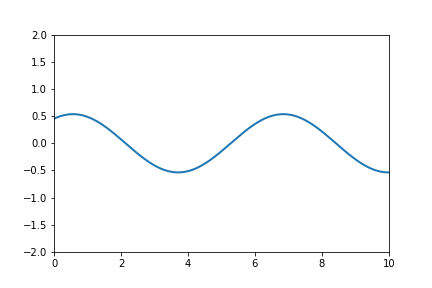
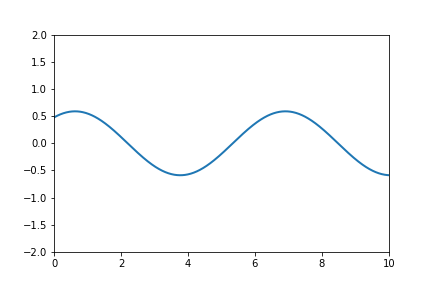
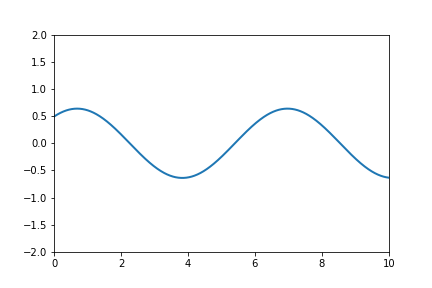
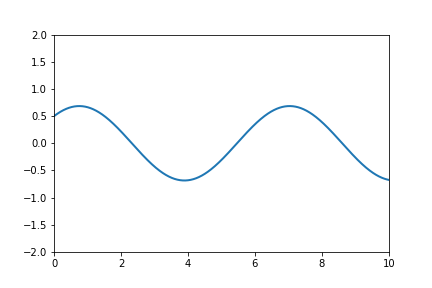
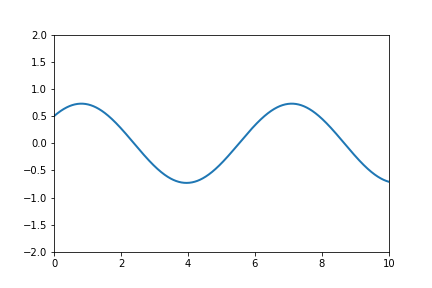
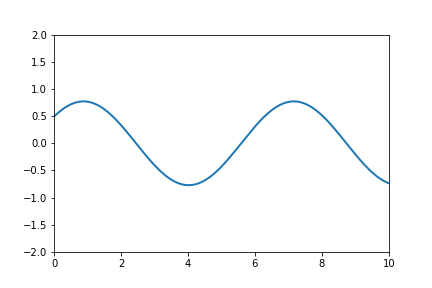
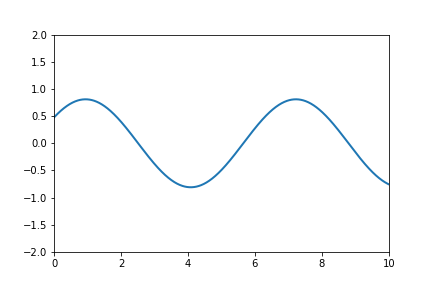
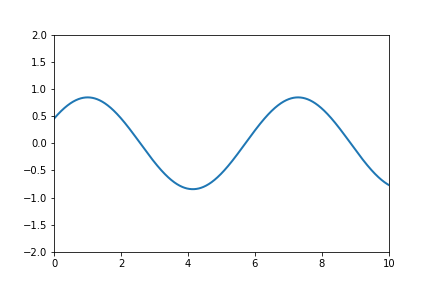
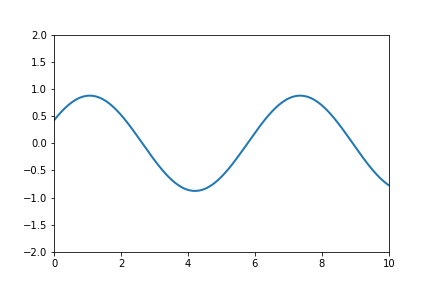
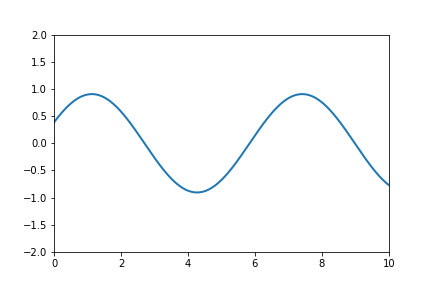
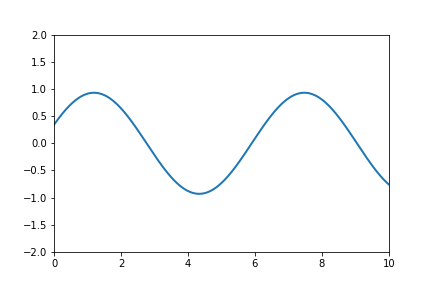
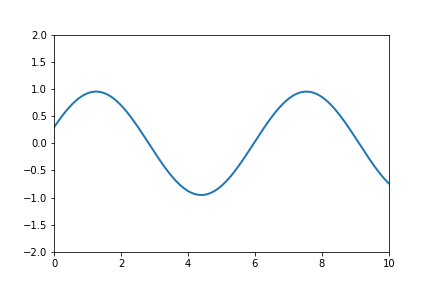
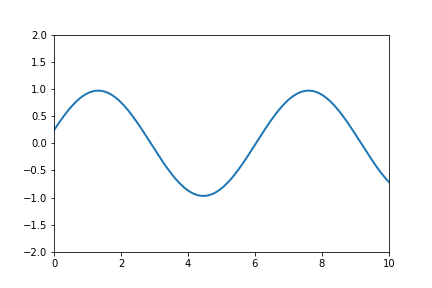
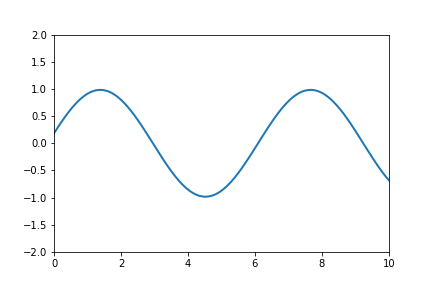
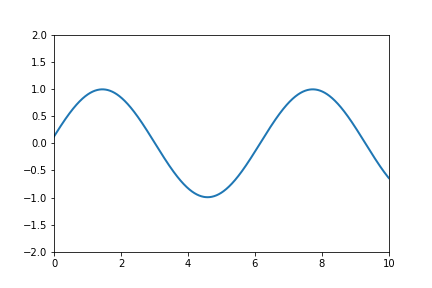
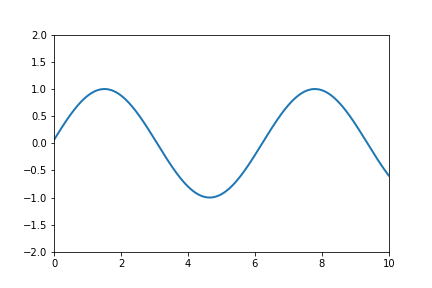
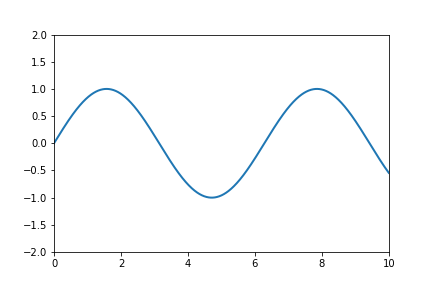
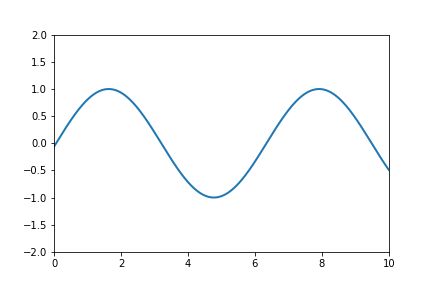
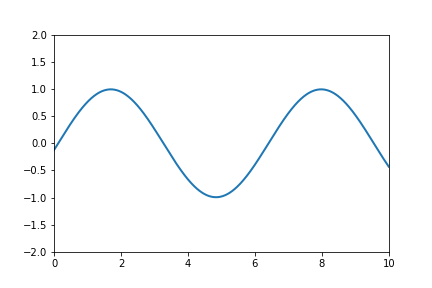
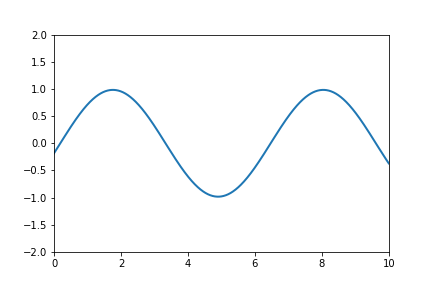
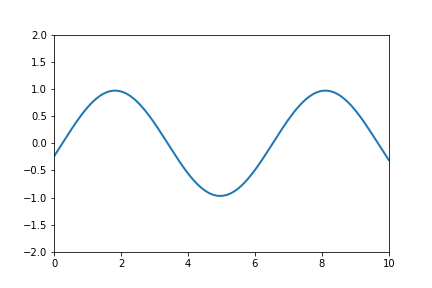
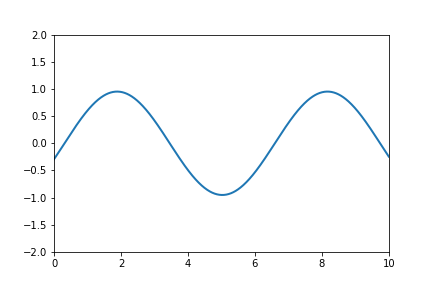
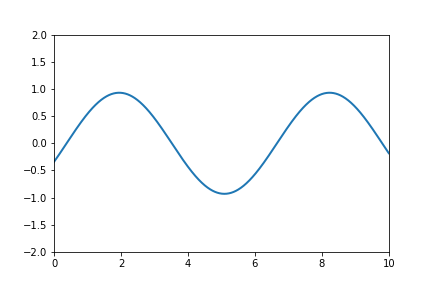
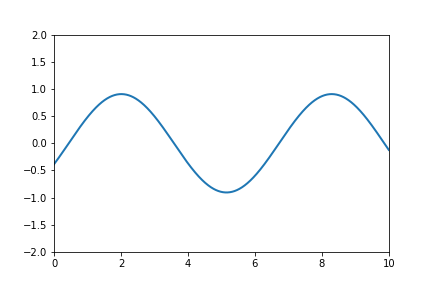
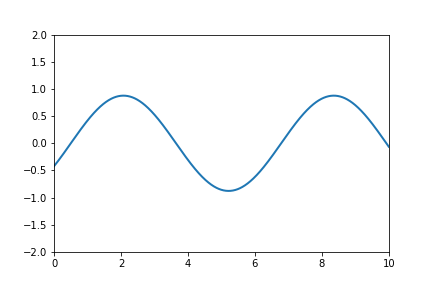
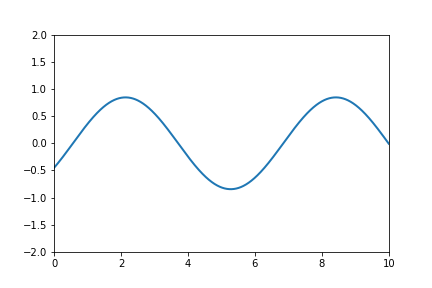
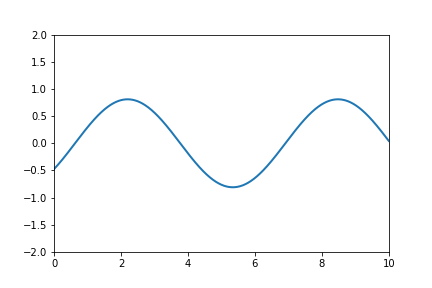
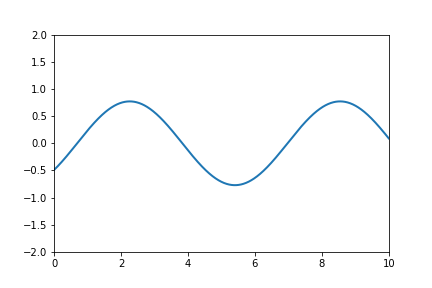
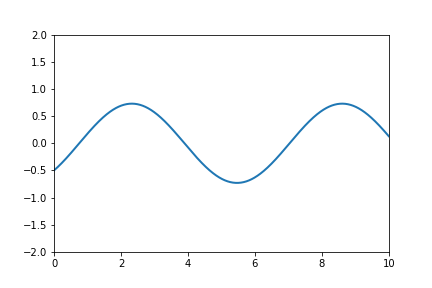
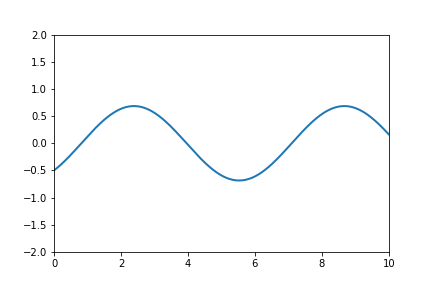
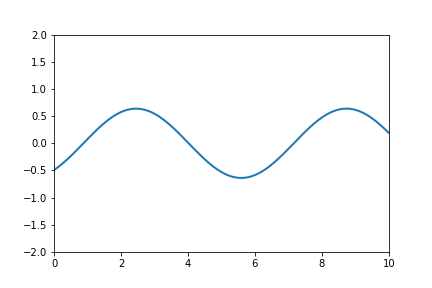
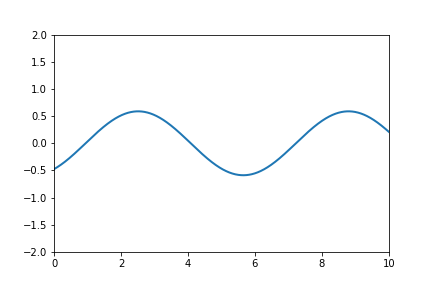
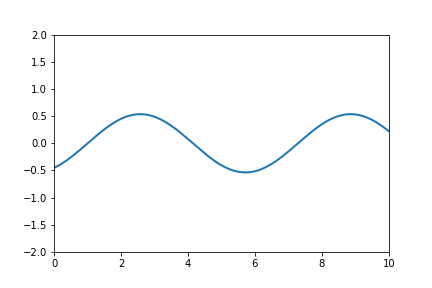
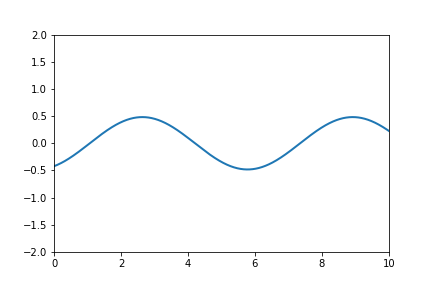
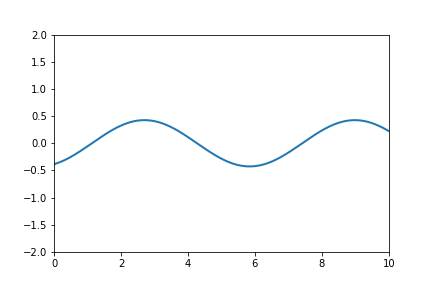
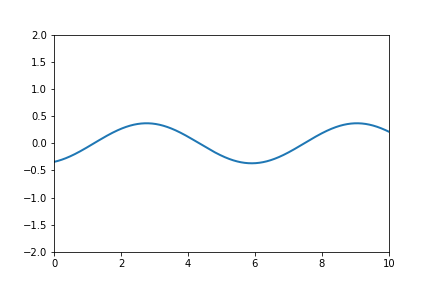
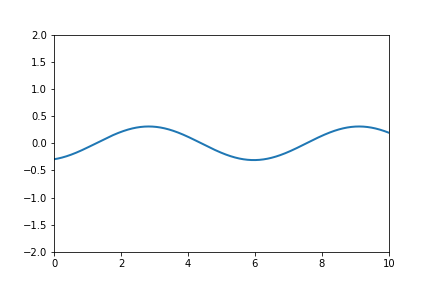
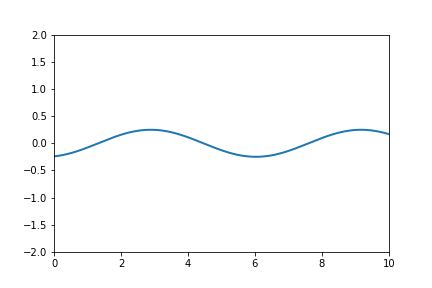
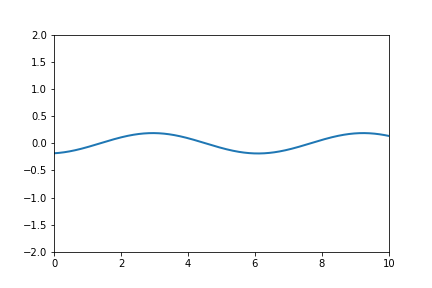
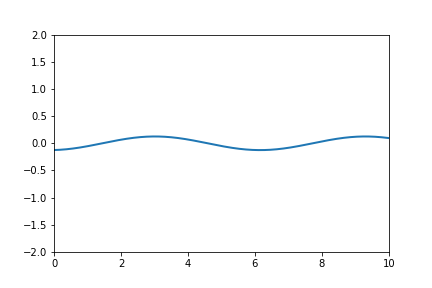
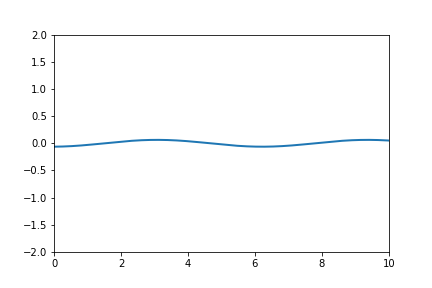
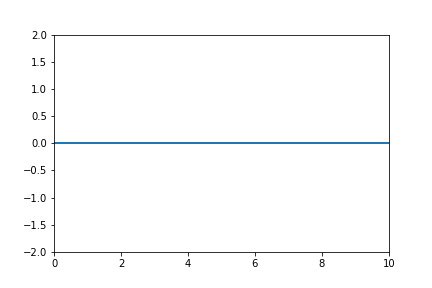
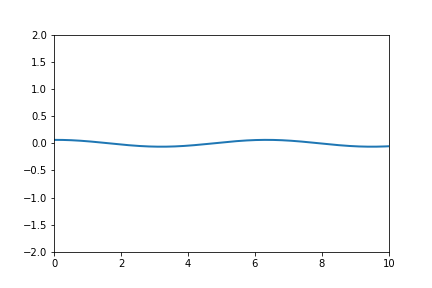
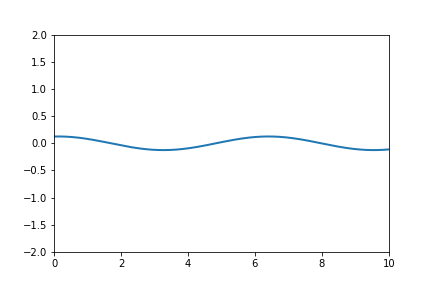
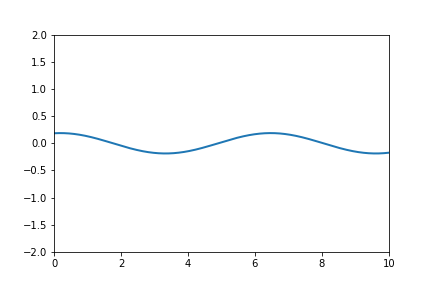
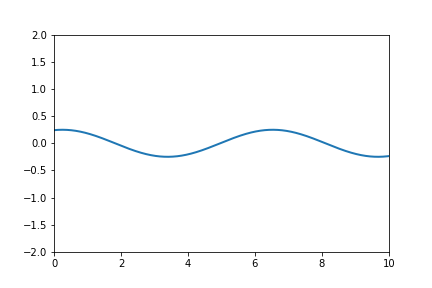
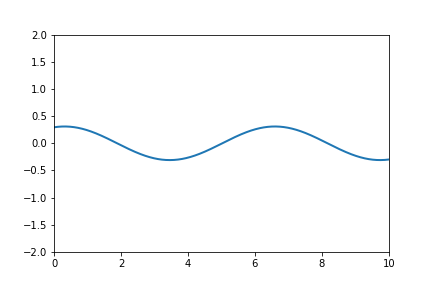
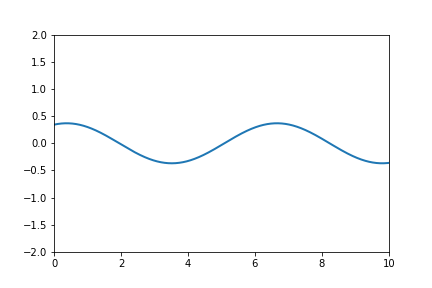
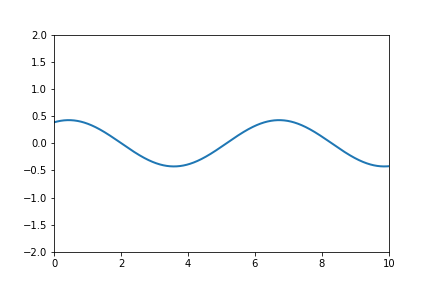
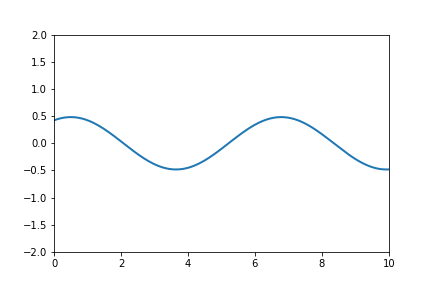
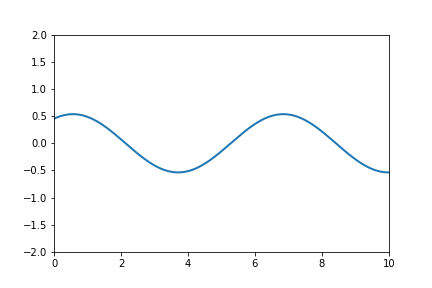
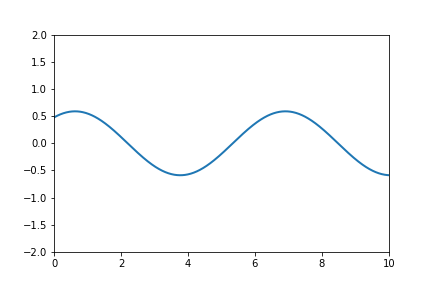
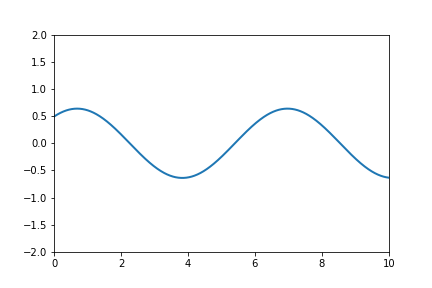
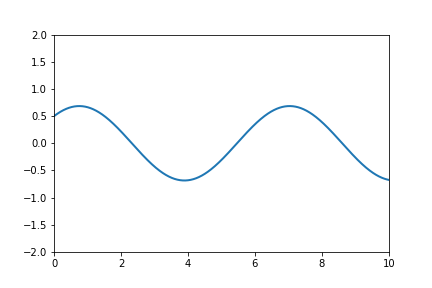
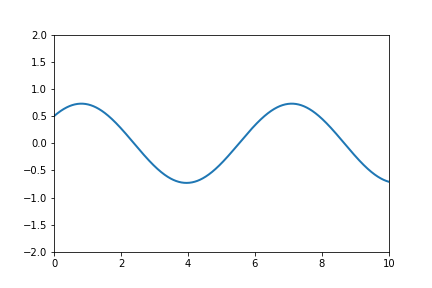
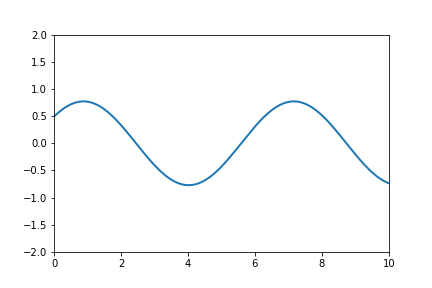
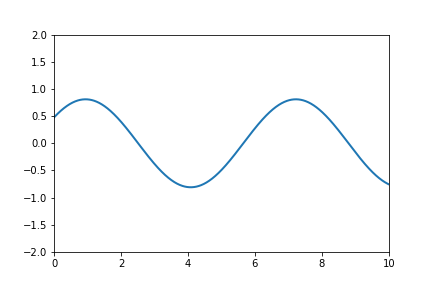
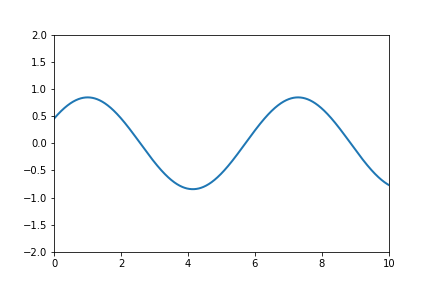
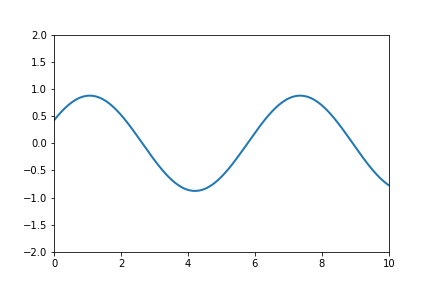
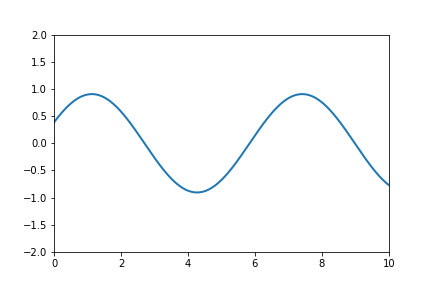
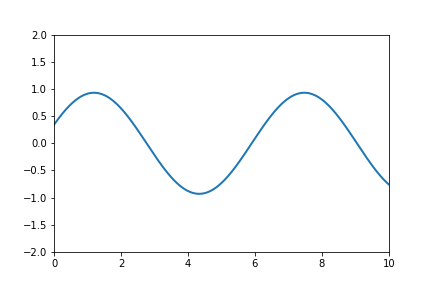
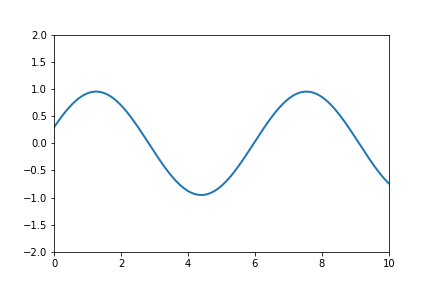
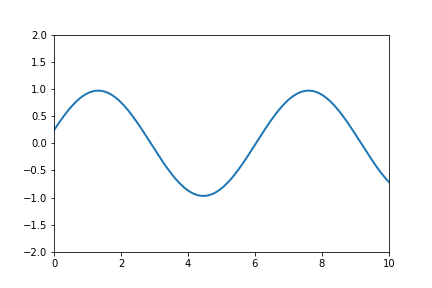
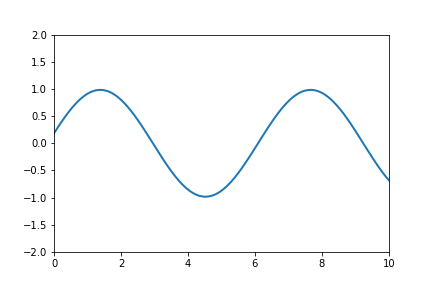
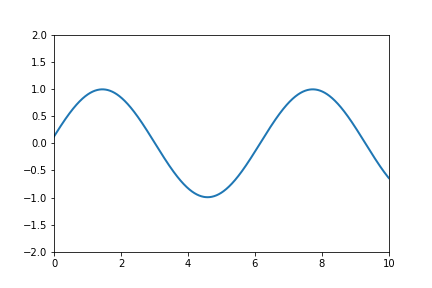
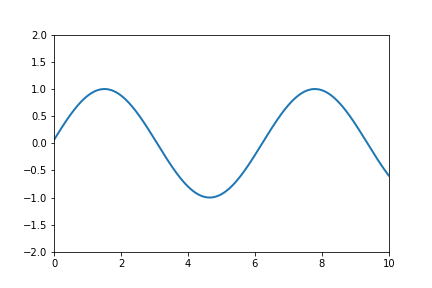

In [14]:
%pylab inline
examples.basic_animation()

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



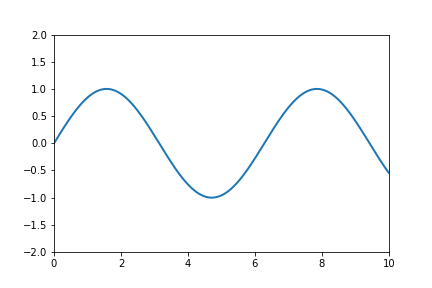
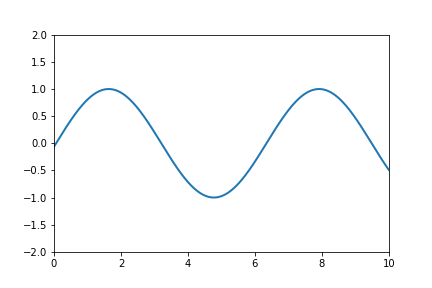
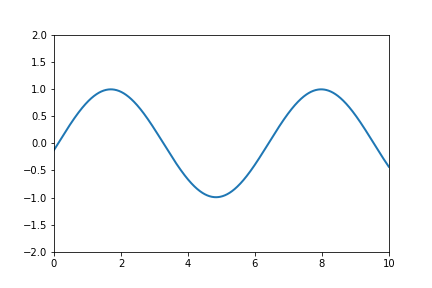
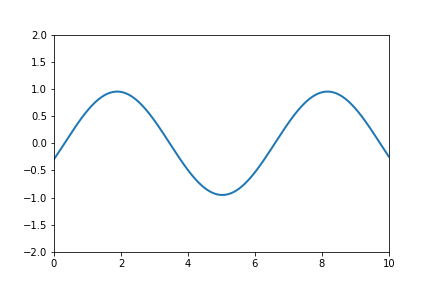
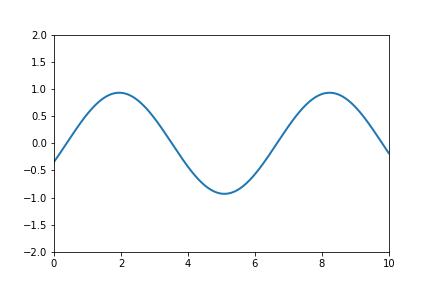
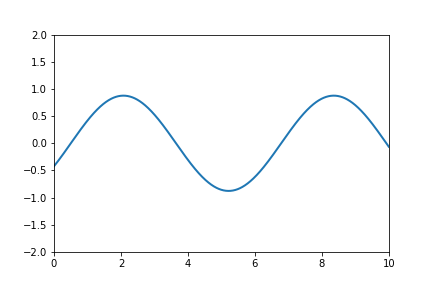
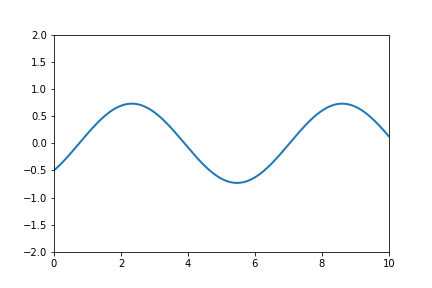
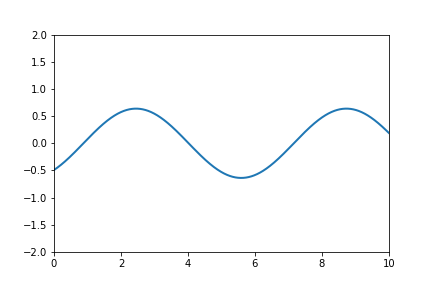
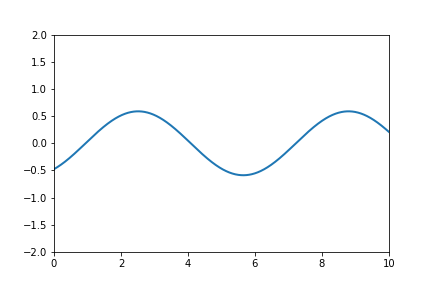
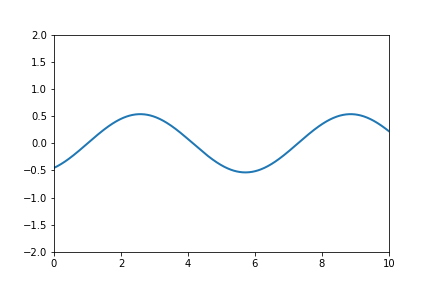
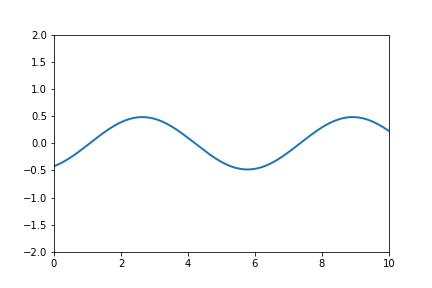
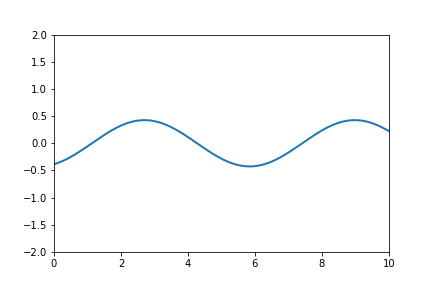
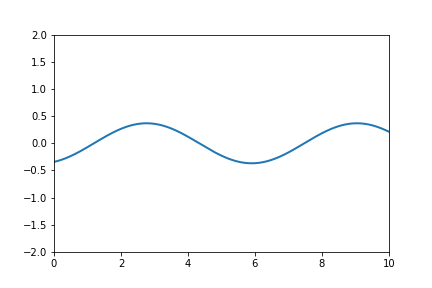
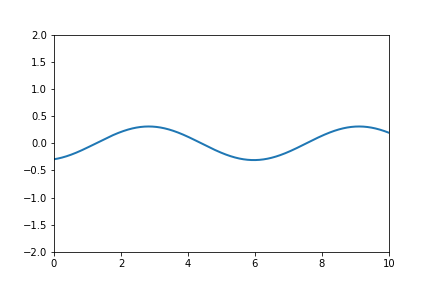
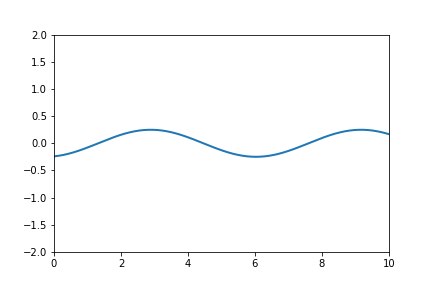
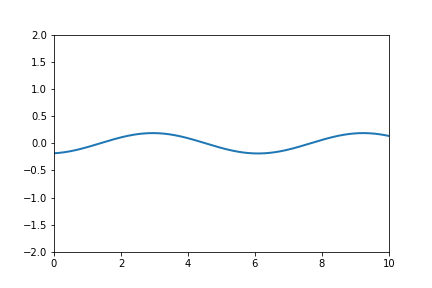
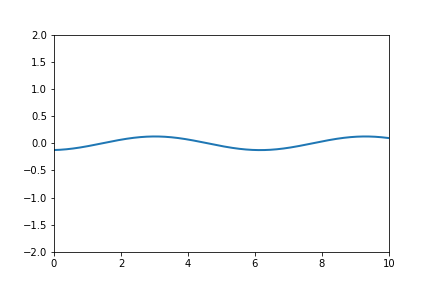
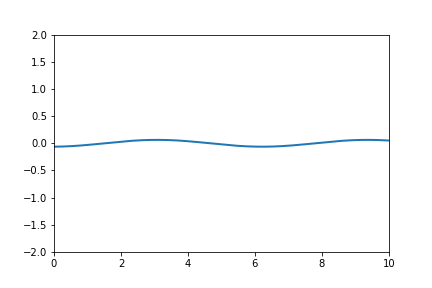
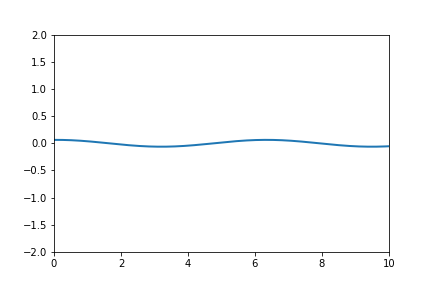
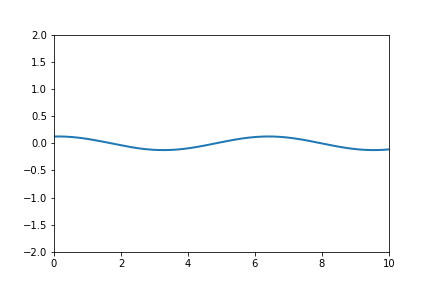
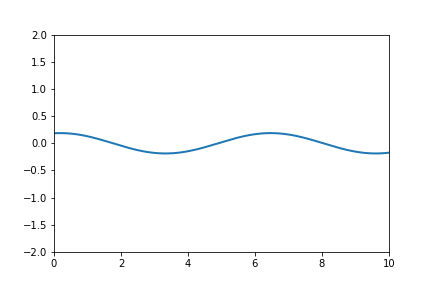
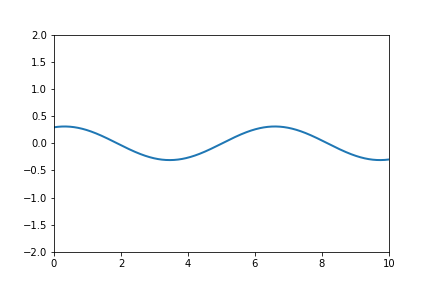
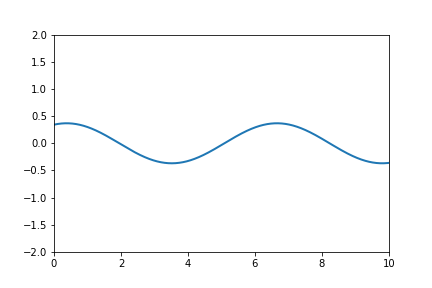
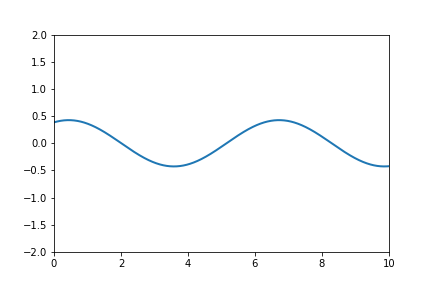
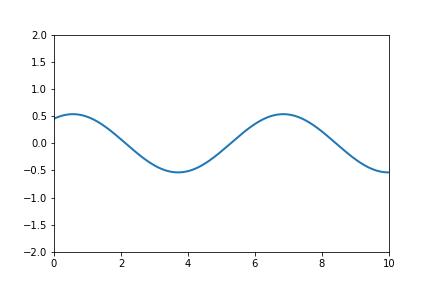
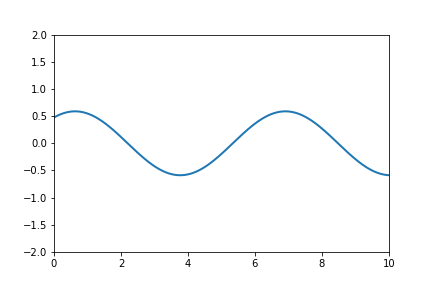
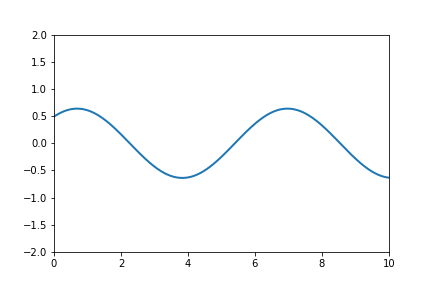
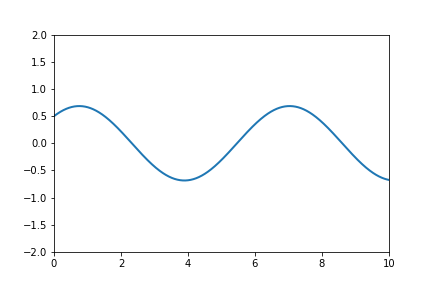
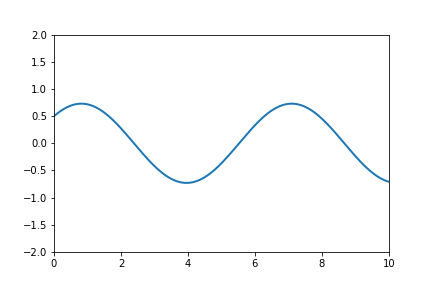
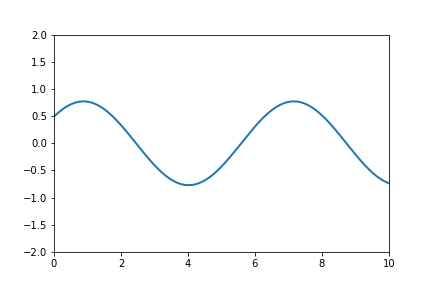
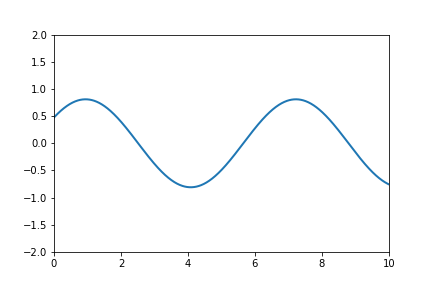
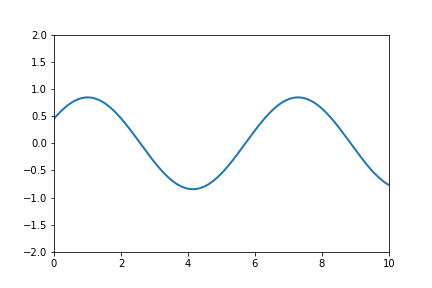
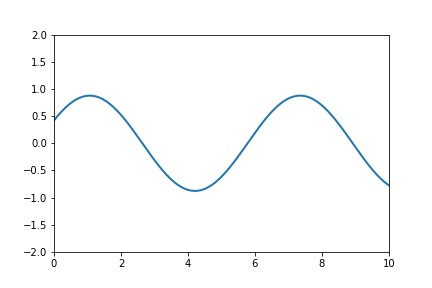
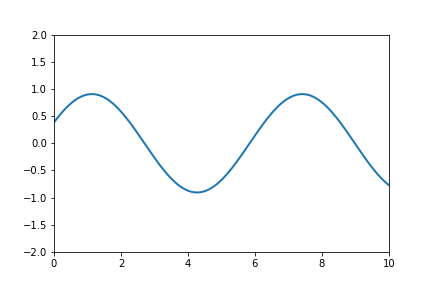
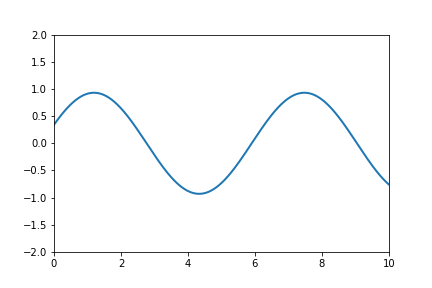
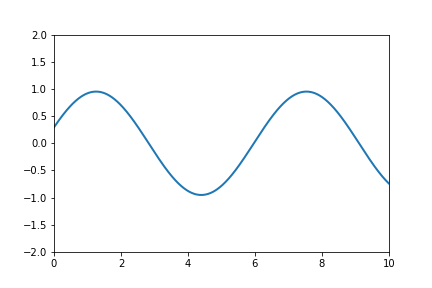
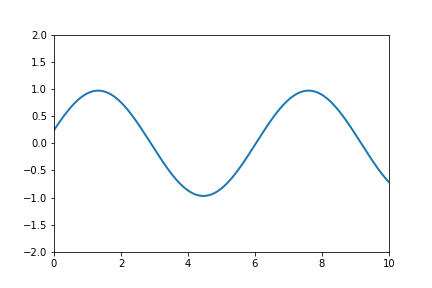
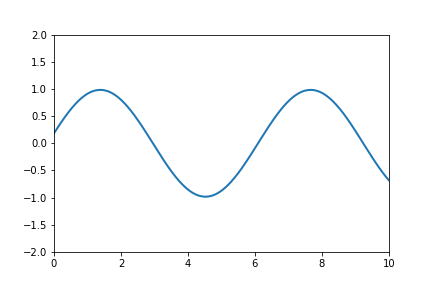
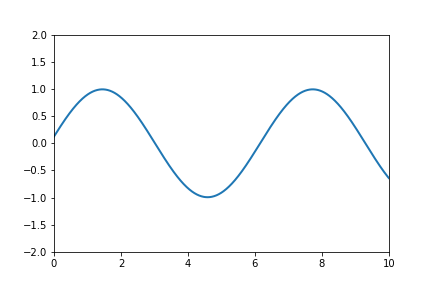
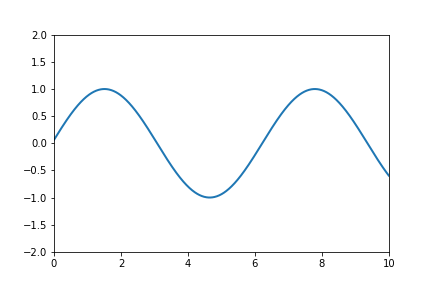
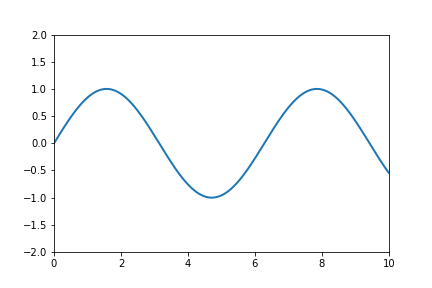
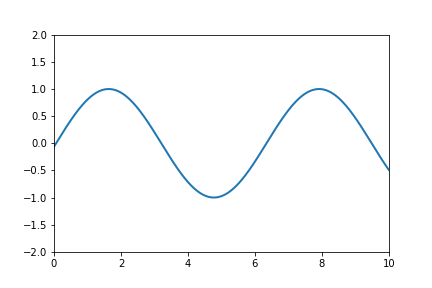
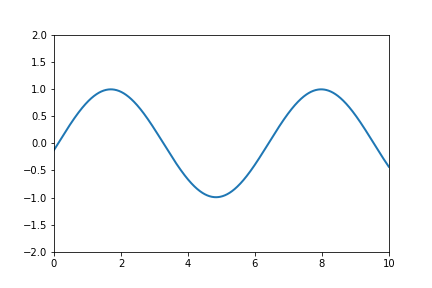
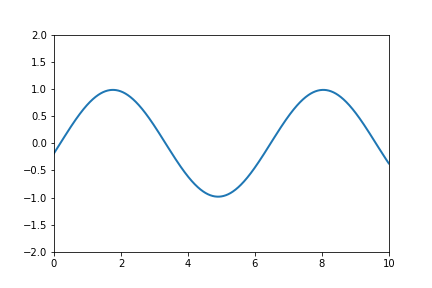
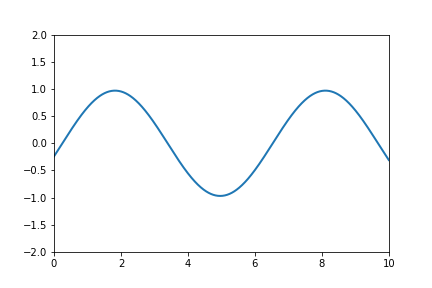
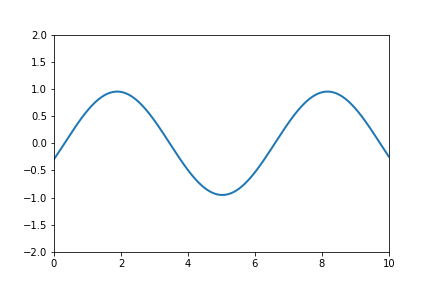
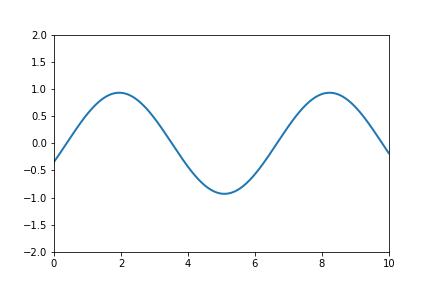
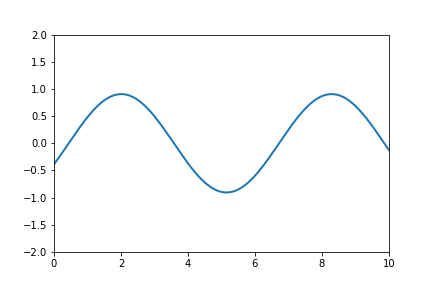
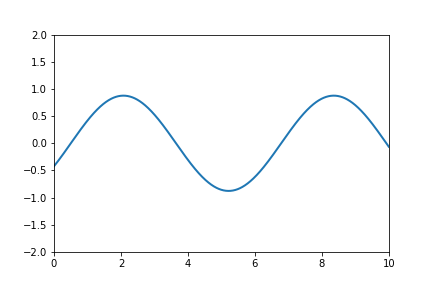
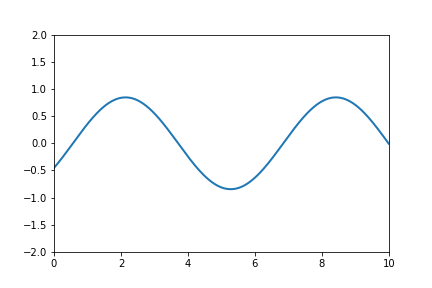
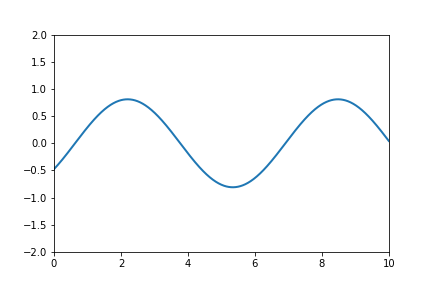
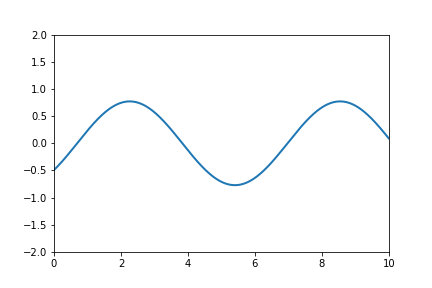
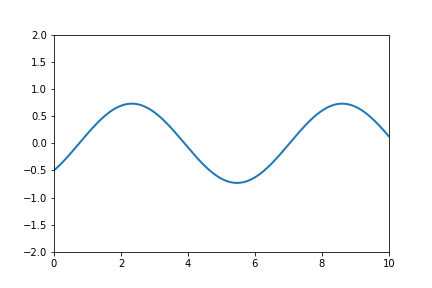
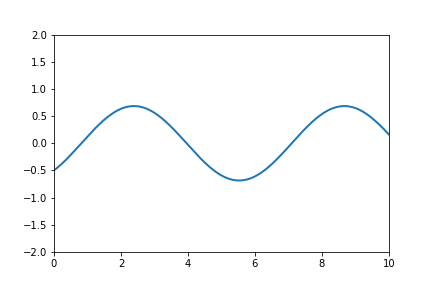
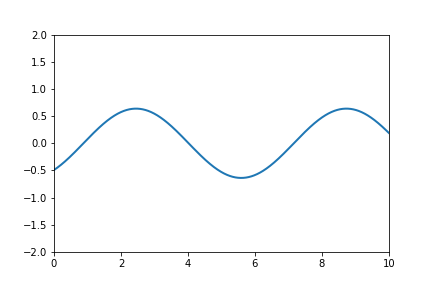
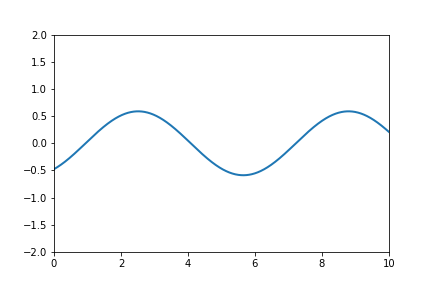
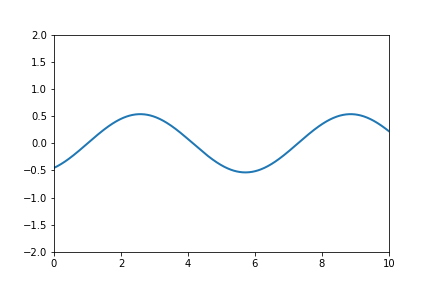
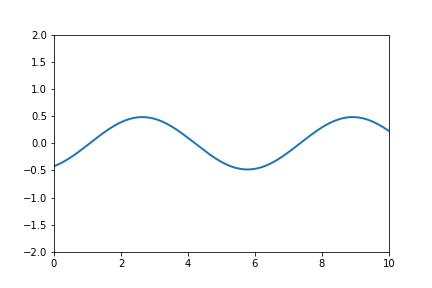
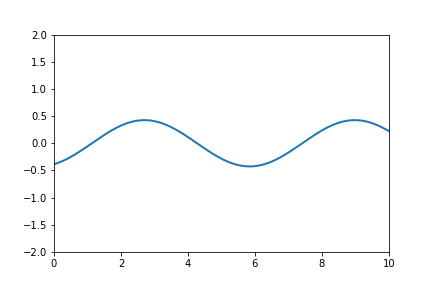
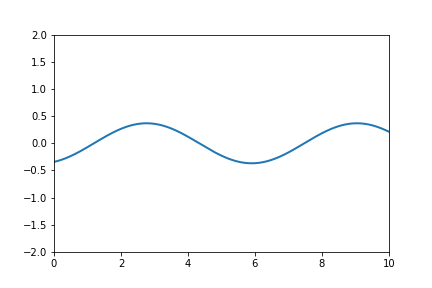
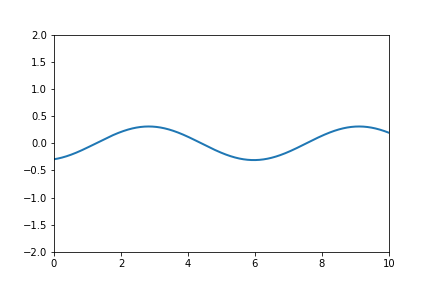
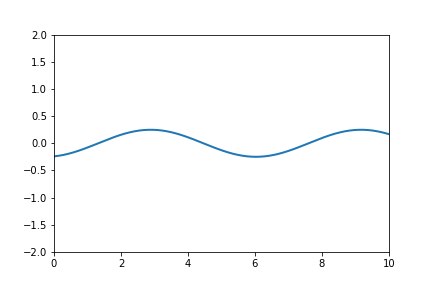
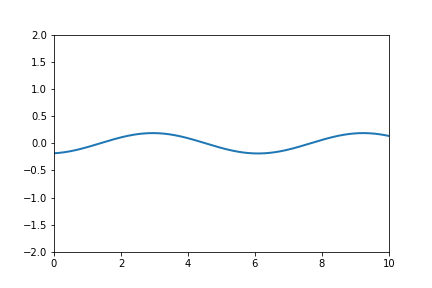
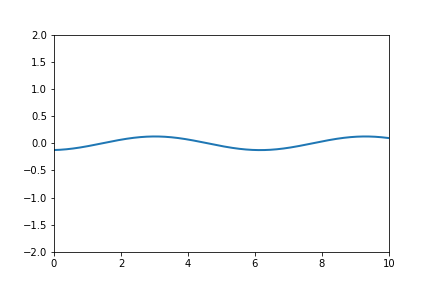
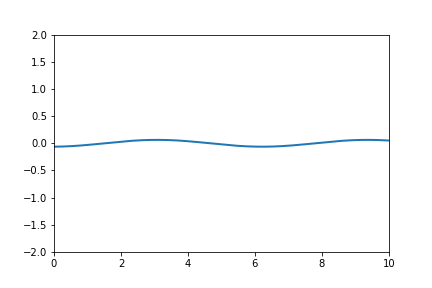
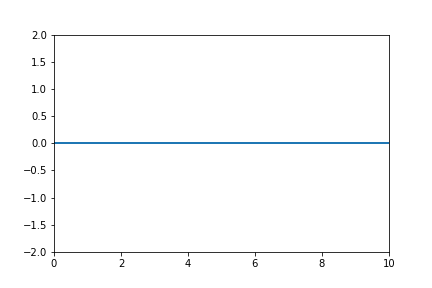
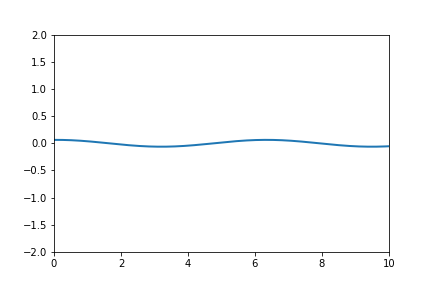
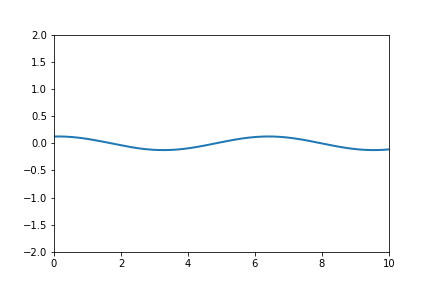
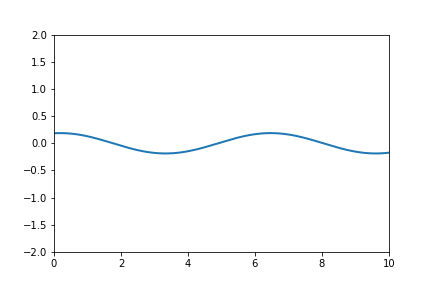
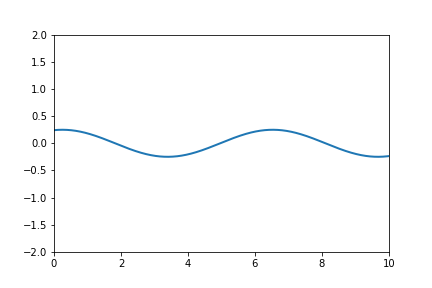
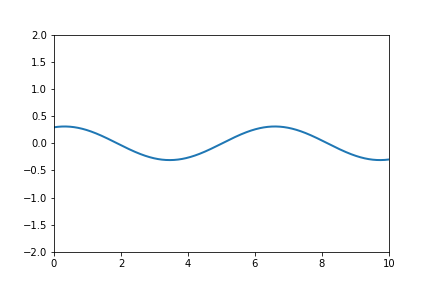
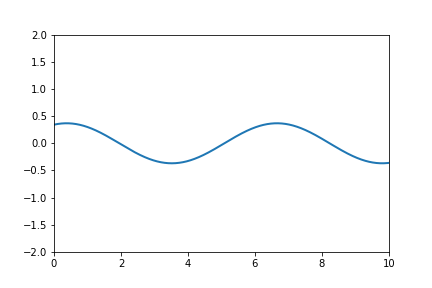
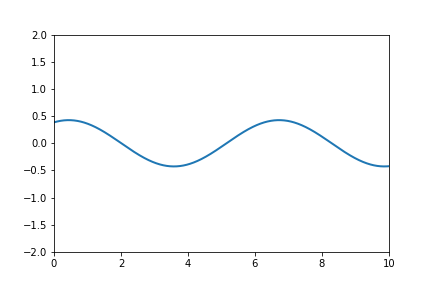
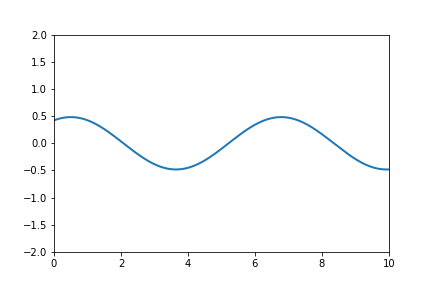
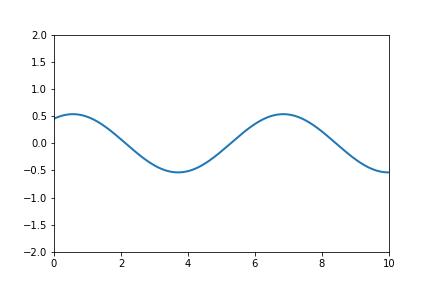
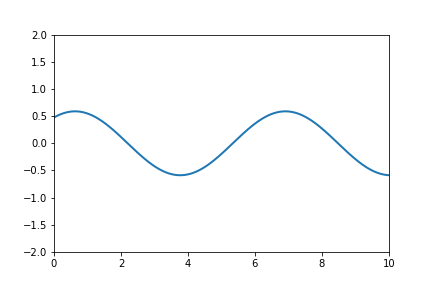
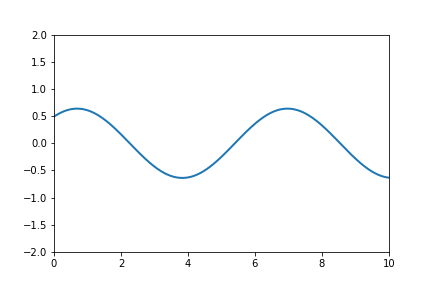
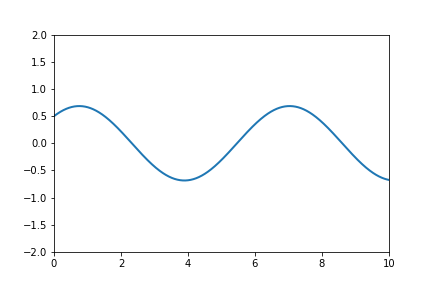
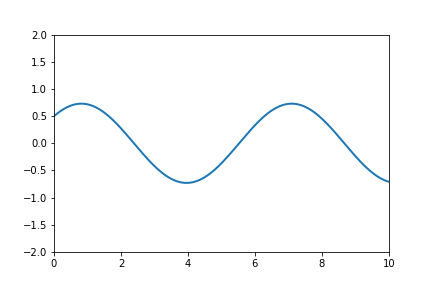
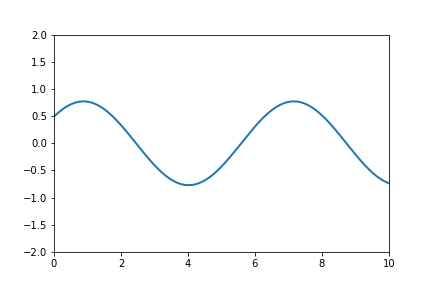
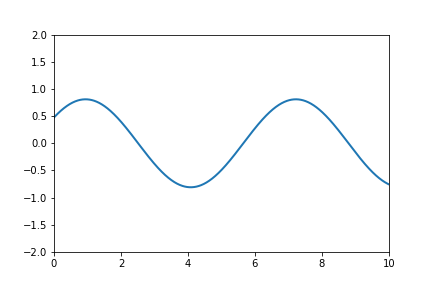
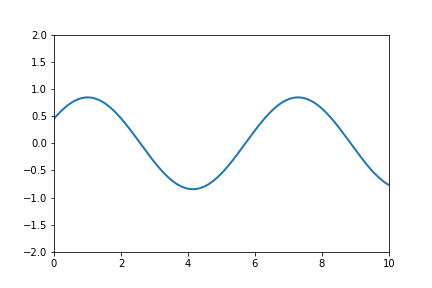
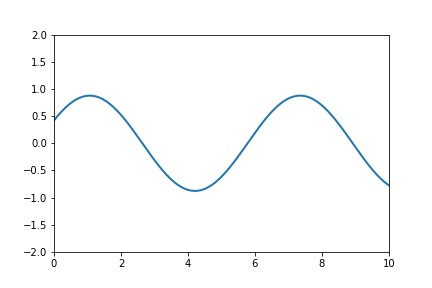
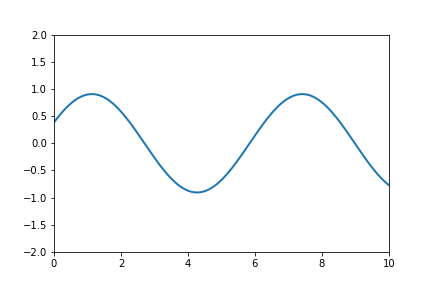
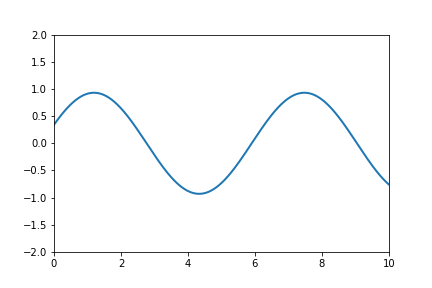
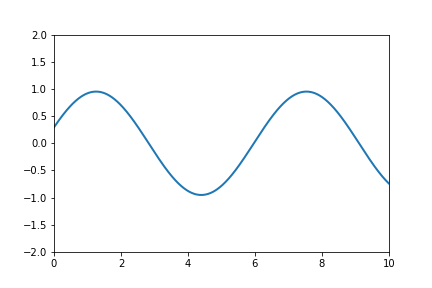
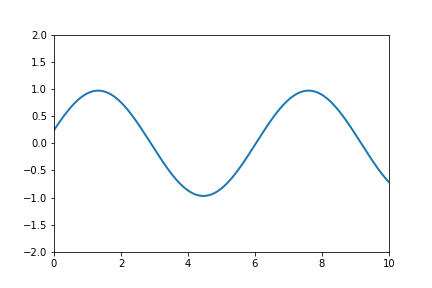
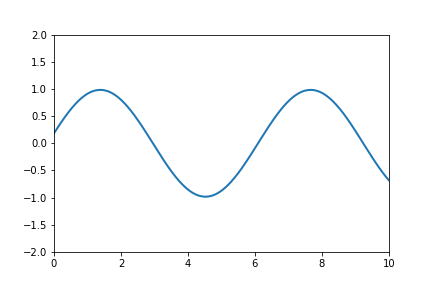
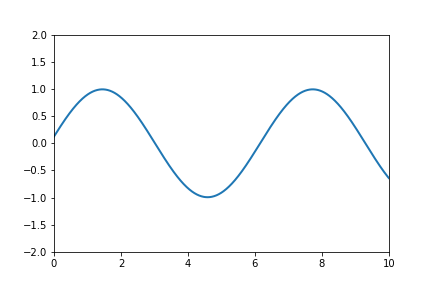
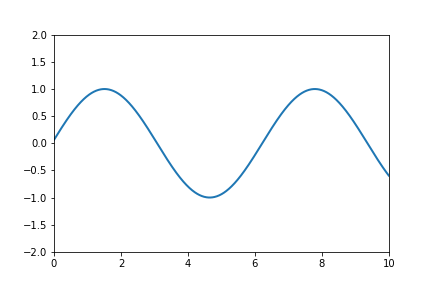

In [3]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x = np.linspace(0, 10, 1000)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi))
    return line,

animation.FuncAnimation(fig, animate, init_func=init,frames=100, interval=20, blit=True)